### Generating The data (lmao not a big thing)

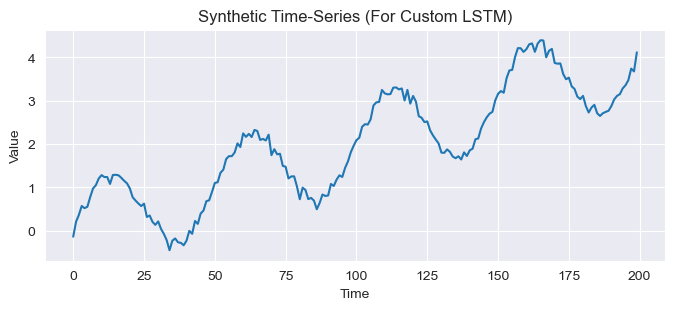

X shape: (195, 5)
y shape: (195,)
Saved dataset to time_series_dataset.csv


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_time_series(N=200, noise=0.1):
    """
    Generates a simple synthetic time-series:
    sine wave + small upward trend + noise.
    Perfect for testing an LSTM built from scratch.
    """
    t = np.linspace(0, 8*np.pi, N)

    # Core signal
    data = (
        np.sin(t) +            # periodic structure
        0.02 * np.arange(N) +  # small trend
        noise * np.random.randn(N)  # noise
    )

    return data

# --- Generate data ---
N = 200
data = generate_time_series(N)

# Plot the data
plt.figure(figsize=(8, 3))
plt.plot(data)
plt.title("Synthetic Time-Series (For Custom LSTM)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# --- Convert time-series to sliding window dataset ---
def create_dataset(series, window=5):
    X, y = [], []
    for i in range(len(series) - window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X), np.array(y)

window = 5
X, y = create_dataset(data, window)

print("X shape:", X.shape)   # (samples, window)
print("y shape:", y.shape)

# Example:
# X[0] = [d0, d1, d2, d3, d4]
# y[0] = d5

# Save to CSV (optional)
import pandas as pd

df = pd.DataFrame(np.hstack([X, y.reshape(-1,1)]),
                  columns=[f'x{i+1}' for i in range(window)] + ['y'])

df.to_csv("time_series_dataset.csv", index=False)
print("Saved dataset to time_series_dataset.csv")


### Initializations (previous cell state, input size, hidden size)

In [22]:
c_t = 0               # previous cell state (Long-Term Memory as per Josh Starmer's video)
input_size = 5        # dimensional data
hidden_size = 8       # no. of LSTM cells
x_t = X[0]            # first row of the data

### Initializing the weights for all 4 gates (Forget gate, input gate, candidate cell state, output gate)

In [21]:
np.random.seed(42)

W_f = np.random.randn(hidden_size, input_size)
W_i = np.random.randn(hidden_size, input_size)
W_c = np.random.randn(hidden_size, input_size)